<a href="https://colab.research.google.com/drive/1TVMi5jN3eHVBVKkHDDFOR8B3hF2J_GAE?authuser=3#scrollTo=1g4-xIRR-iNF" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cause_death - cause_death.csv")

data = df

data = data.drop(['ause Name', 'Age-adjusted Death Rate'], axis=1)

data.head(10)

,Year,Cause Name,State,Deaths
0,1999,Unintentional Injuries,Alabama,2313.0
1,1999,Unintentional Injuries,Alaska,294.0
2,1999,Unintentional Injuries,Arizona,2214.0
3,1999,Unintentional Injuries,Arkansas,1287.0
4,1999,Unintentional Injuries,California,9198.0
5,1999,Unintentional Injuries,Colorado,1519.0
6,1999,Unintentional Injuries,Connecticut,1034.0
7,1999,Unintentional Injuries,Delaware,267.0
8,1999,Unintentional Injuries,District of Columbia,161.0
9,1999,Unintentional Injuries,Florida,5961.0


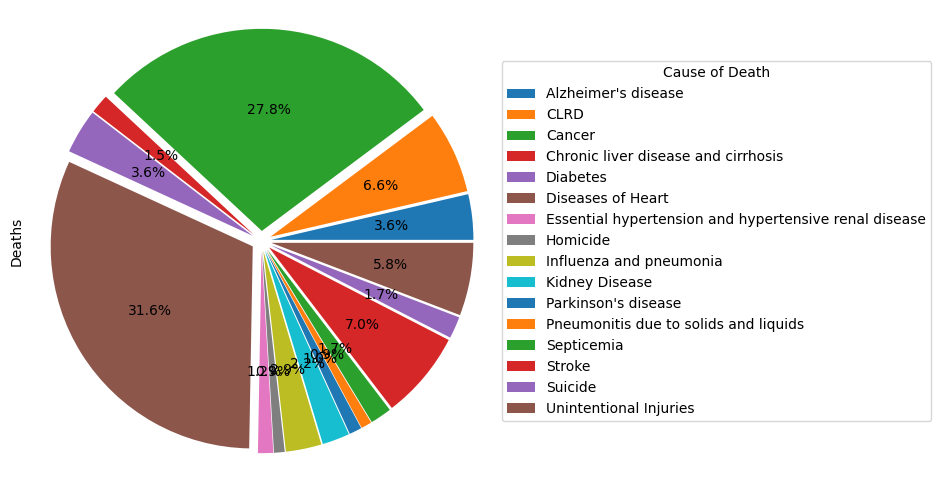

In [3]:
data = data.dropna()

cause_of_death_counts = data[data['Cause Name'] != 'All Causes'].groupby(['Cause Name'])['Deaths'].sum()
num_causes = len(cause_of_death_counts)
explode = [0.05] * num_causes

cause_of_death_counts.plot(kind='pie', figsize=(6, 6), explode=explode,autopct='%1.1f%%', labeldistance=None)
plt.axis('equal')
plt.legend(cause_of_death_counts.index, title='Cause of Death', loc='center left', bbox_to_anchor=(1, 0.5)) #adjust the packing legend
plt.show()

# Death per Year

In [4]:
deaths_per_year = data.groupby(['Year'])['Deaths'].sum()
deaths_per_year.astype(int)

Year
1999    8835759
2000    8860954
2001    8896903
2002    8991633
2003    8993958
2004    8794672
2005    8959026
2006    8843211
2007    8826756
2008    8983025
2009    8841806
2010    8938853
2011    9079115
2012    9156403
2013    9345106
2014    9465942
2015    9809028
Name: Deaths, dtype: int32

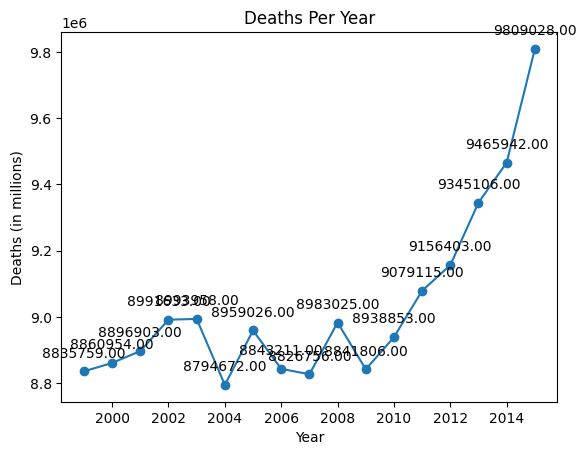

In [6]:
x_values = deaths_per_year.index
y_values = deaths_per_year.values

bar_container = plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Deaths (in millions)')
plt.title('Deaths Per Year')

for x, y in zip(x_values, y_values):
  label = "{:.2f}".format(y)

  plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha="center")

plt.show()

# Total Deaths per Cause

In [ ]:
data['Deaths'] = data['Deaths'].astype(int)

data.groupby(['Cause Name'])['Deaths'].sum()

Cause Name
All Causes                                               84341636
Alzheimer's disease                                       2514618
CLRD                                                      4560260
Cancer                                                   19292996
Chronic liver disease and cirrhosis                       1043674
Diabetes                                                  2472642
Diseases of Heart                                        21879846
Essential hypertension and hypertensive renal disease      841098
Homicide                                                   590599
Influenza and pneumonia                                   1974864
Kidney Disease                                            1515868
Parkinson's disease                                        696518
Pneumonitis due to solids and liquids                      589791
Septicemia                                                1188968
Stroke                                                    4875996

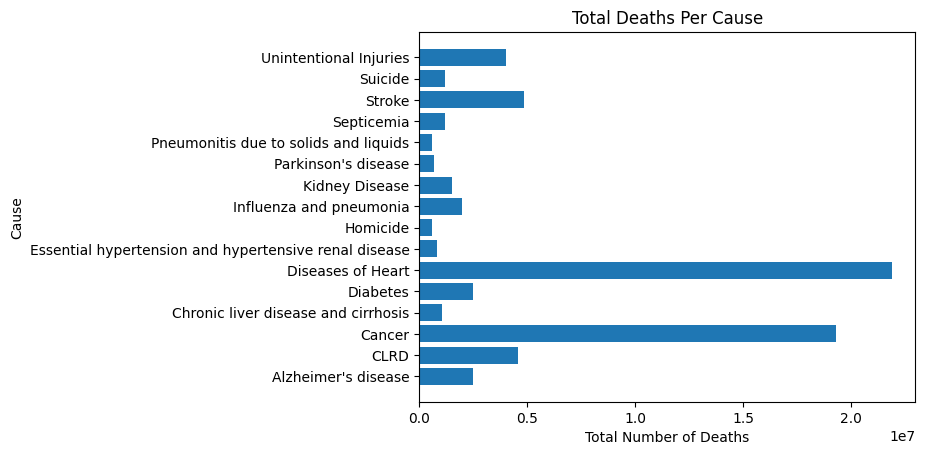

In [ ]:
# Group by 'Cause Name' and take the sum of 'Deaths' for each cause
total_deaths_per_cause = data[data['Cause Name'] != "All Causes"].groupby('Cause Name')['Deaths'].sum()

# Plotting the horizontal bar chart
plt.barh(total_deaths_per_cause.index, total_deaths_per_cause.values)

# Adding labels and title
plt.xlabel('Total Number of Deaths')
plt.ylabel('Cause')
plt.title('Total Deaths Per Cause')

# Displaying the graph
plt.show()